**ONLINE RETAIL RECOMMENDATION SYSTEM**

**Author: KEERTHANA GOPAL**

**Environmental Setup**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.sparse.linalg import svds

**Data Preparation**

In [2]:
data = pd.read_csv('OnlineRetail.csv')

**Data Overview and Exploration**

In [4]:
data.shape

(541909, 8)

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Viewing DataFrame Information**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Identifying Missing Values**

In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Data Cleaning**

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Exploratory Data Analysis (EDA)**

In [12]:
data.dropna(subset=['CustomerID'], inplace=True)

In [13]:
data['CustomerID'] = data['CustomerID'].astype(int)

In [16]:
sales_by_country = data.groupby('Country')['Quantity'].sum().reset_index()
sales_by_country = sales_by_country.sort_values(by='Quantity', ascending=False).reset_index(drop=True)
top_country = sales_by_country.iloc[0]
other_sales = sales_by_country.iloc[1:].sum(numeric_only=True)
other_sales['Country'] = 'Other'
combined_sales = pd.DataFrame([top_country, other_sales])

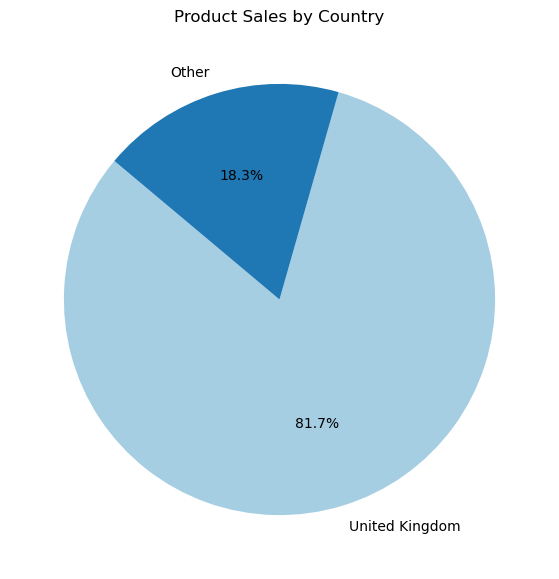

In [17]:
plt.figure(figsize=(10, 7))
plt.pie(combined_sales['Quantity'], labels=combined_sales['Country'],autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Product Sales by Country')
plt.show()

In [18]:
uk_data = data[data['Country'] == 'United Kingdom']

In [20]:
product_sales = uk_data.groupby('Description')['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity', ascending=False).reset_index(drop=True)
top_products = product_sales.head(10)
print(top_products)

                          Description  Quantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS     47982
1             JUMBO BAG RED RETROSPOT     40880
2       ASSORTED COLOUR BIRD ORNAMENT     32679
3  WHITE HANGING HEART T-LIGHT HOLDER     32097
4                      POPCORN HOLDER     28562
5           PACK OF 12 LONDON TISSUES     24313
6                  BROCADE RING PURSE     22708
7     PACK OF 72 RETROSPOT CAKE CASES     22205
8     VICTORIAN GLASS HANGING T-LIGHT     21456
9  PACK OF 60 PINK PAISLEY CAKE CASES     19916


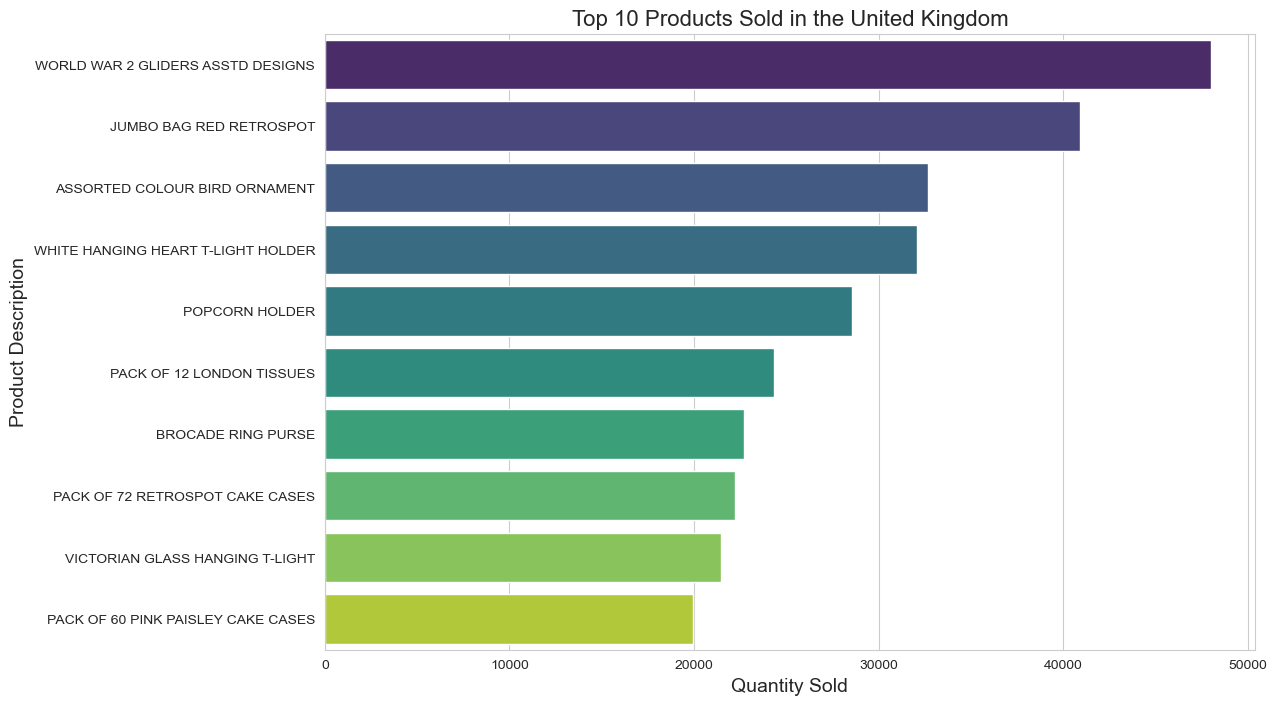

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Description', data=top_products,hue='Description', dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Products Sold in the United Kingdom', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Product Description', fontsize=14)
plt.show()

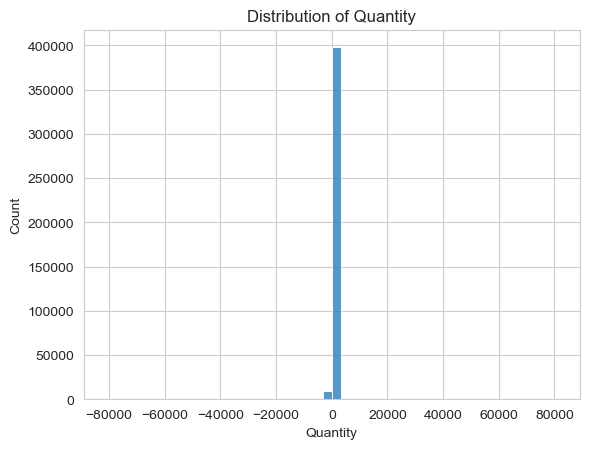

In [22]:
sns.histplot(data['Quantity'], bins=50, kde=False)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')
plt.show()

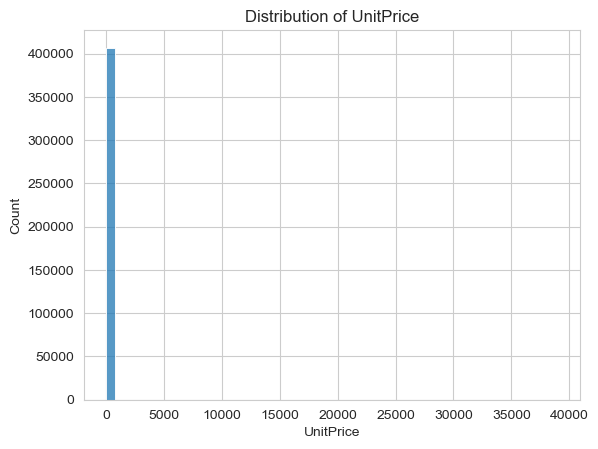

In [23]:
sns.histplot(data['UnitPrice'], bins=50, kde=False)
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.title('Distribution of UnitPrice')
plt.show()

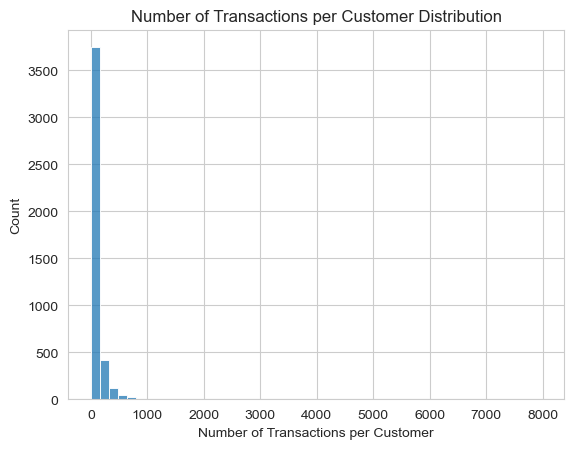

In [24]:
transactions_per_customer = data.groupby('CustomerID').size()
sns.histplot(transactions_per_customer, bins=50, kde=False)
plt.xlabel('Number of Transactions per Customer')
plt.ylabel('Count')
plt.title('Number of Transactions per Customer Distribution')
plt.show()

**Creating User-Item Matrix**

In [25]:
user_item_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

In [26]:
user_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Collaborative Filtering Using SVD (Scipy)**

In [27]:
 user_item_matrix_filled = user_item_matrix.fillna(0)
user_ratings_mean = np.mean(user_item_matrix_filled, axis=1)
R_demeaned = user_item_matrix_filled.values - user_ratings_mean.values.reshape(-1, 1)

In [28]:
U, sigma, Vt = svds(R_demeaned, k=50)

In [29]:
sigma = np.diag(sigma)

In [30]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.values.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)

**Recommendations for customer with Descriptions**

In [33]:
def get_top_n_recommendations(CustomerID, n=10):
    customer_index = user_item_matrix.index.get_loc(CustomerID)
    customer_predictions = predicted_ratings_df.iloc[customer_index].sort_values(ascending=False)
    purchased_products = user_item_matrix.columns[user_item_matrix.iloc[customer_index] > 0]
    recommendations = customer_predictions.drop(purchased_products)
    top_n_recommendations = recommendations.head(n).reset_index()
    top_n_recommendations.columns = ['StockCode', 'Predicted Rating']
    product_info = data[['StockCode', 'Description']].drop_duplicates()
    top_n_recommendations = top_n_recommendations.merge(product_info,on='StockCode', how='left')
    return top_n_recommendations[['StockCode', 'Description', 'Predicted Rating']]

In [34]:
CustomerID = 17850
recommendations = get_top_n_recommendations(CustomerID, n=10)
print(f"Top 10 recommendations for customer {CustomerID}:\n{recommendations}")

Top 10 recommendations for customer 17850:
   StockCode                         Description  Predicted Rating
0      21232      STRAWBERRY CERAMIC TRINKET BOX         41.629816
1      21232      STRAWBERRY CERAMIC TRINKET POT         41.629816
2      84212       ASSORTED FLOWER COLOUR "LEIS"         21.945908
3      84949       SILVER HANGING T-LIGHT HOLDER         19.650624
4      22095                LADS ONLY TISSUE BOX         18.379924
5      22646  CERAMIC STRAWBERRY CAKE MONEY BANK         18.235100
6     85099B             JUMBO BAG RED RETROSPOT         16.961831
7      71477   COLOUR GLASS. STAR T-LIGHT HOLDER         16.858674
8      71477  COLOURED GLASS STAR T-LIGHT HOLDER         16.858674
9      22041        RECORD FRAME 7" SINGLE SIZE          15.439506
10     21108  FAIRY CAKE FLANNEL ASSORTED COLOUR         14.585567
11     21175         GIN + TONIC DIET METAL SIGN         13.595696
12     21175       GIN AND TONIC DIET METAL SIGN         13.595696


In [35]:
CustomerID = 13047
recommendations = get_top_n_recommendations(CustomerID, n=10)
print(f"Top 10 recommendations for customer {CustomerID}:\n{recommendations}")

Top 10 recommendations for customer 13047:
   StockCode                          Description  Predicted Rating
0      84949        SILVER HANGING T-LIGHT HOLDER         10.646674
1      22492               MINI PAINT SET VINTAGE         10.077383
2      21915                RED  HARMONICA IN BOX          8.244715
3      23230                 WRAP ALPHABET DESIGN          6.377619
4      21914                BLUE HARMONICA IN BOX          5.947999
5      23209             LUNCH BAG DOILEY PATTERN          5.281656
6      23209              LUNCH BAG VINTAGE DOILY          5.281656
7      23209             LUNCH BAG VINTAGE DOILEY          5.281656
8      23203            JUMBO BAG DOILEY PATTERNS          5.056550
9      23203             JUMBO BAG VINTAGE DOILEY          5.056550
10     23203              JUMBO BAG VINTAGE DOILY          5.056550
11     22865               HAND WARMER OWL DESIGN          5.056101
12     22909  SET OF 20 VINTAGE CHRISTMAS NAPKINS          4.838799
13   